# Importing the required python libraries

In [1]:
# import numpy package for arrays and stuff 
import numpy as np  
import csv
# import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 
import seaborn as sb # used to plot the heatmap
# import pandas for importing csv files and data fromatting
import pandas as pd  
import pickle
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split # used to split the data into training set (70%) and testing set (30%)
from sklearn.preprocessing import OneHotEncoder # Used to label encoding and one-hot encoding
from sklearn.model_selection import KFold

# Data loading and preprocessing

 


In [2]:
# The data is read as a pandas data frame
data = pd.read_csv("finalized_data.csv").dropna()

In [3]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

### One-hot encoding of categorical features

In [4]:
# Array that specifies which columns are categorical inputs
categorical_features = ["0", "1", "2", "3", "4","5", "6", "7","8"] # Except column "7", all are label encoded and "7" is 
                                                               # one-hot encoded. 
# categorical_features = ["0", "1", "2", "3", "4","5", "6", "7","8"] # Except column "7", all are label encoded and "7" is 
                                                               # one-hot encoded. 
# Array that specifies which columns are continuous inputs
# contnuous_features = ["9","10","11"]
output_feature = "12"  # specifies which column is output


temp={}
label_encoders = {} 
# for loop starts for label encoding
for i in range(0,len(categorical_features)):
    print(i)
    #codes for one-hot encoding
    label_encoders[categorical_features[i]] = OneHotEncoder(handle_unknown='ignore')
    label_encoders[categorical_features[i]].fit(data[categorical_features[i]].values.reshape(-1,1))
    temp[categorical_features[i]]=label_encoders[categorical_features[i]].transform(data[categorical_features[i]].values.reshape(-1,1)).toarray() 
    

0
1
2
3
4
5
6
7
8


In [5]:
#printing the dimensions of each categorical variables after one-hot encoding
for i in range(0,len(temp)):
    print(temp[categorical_features[i]].shape)

(1263600, 13)
(1263600, 3)
(1263600, 3)
(1263600, 3)
(1263600, 3)
(1263600, 4)
(1263600, 3)
(1263600, 4)
(1263600, 21)


In [6]:
# Adding the one hot encoded features into the data
# The new columns will be named from 13 onwards.
ind=13
for i in range(0,len(categorical_features)):
    for j in range(0,temp[categorical_features[i]].shape[1]):
        data[str(ind)] = temp[categorical_features[i]][:,j]
        ind=ind+1
    data=data.drop([categorical_features[i]], axis=1) # The old column is deleted from the data
      
    

In [7]:
print(data) # Data after one-hot encoding.
print(data.shape)     # New dimension of the data. 

                 9         10         11        12   13   14   15   16   17  \
0        -1.000000 -13.016747   6.399998  0.010556  1.0  0.0  0.0  0.0  0.0   
1        -1.000000 -13.016747   7.199998  0.011241  1.0  0.0  0.0  0.0  0.0   
2        -1.000000 -13.016747   7.999998  0.012185  1.0  0.0  0.0  0.0  0.0   
3        -1.000000 -13.016747   8.799997  0.013634  1.0  0.0  0.0  0.0  0.0   
4        -1.000000 -13.016747   9.599998  0.014240  1.0  0.0  0.0  0.0  0.0   
...            ...        ...        ...       ...  ...  ...  ...  ...  ...   
1263595  12.283293  -3.000003  66.399963  0.000000  0.0  0.0  0.0  0.0  0.0   
1263596  12.283293  -3.000003  67.199959  0.000000  0.0  0.0  0.0  0.0  0.0   
1263597  12.283293  -3.000003  67.999962  0.000000  0.0  0.0  0.0  0.0  0.0   
1263598  12.283293  -3.000003  68.799957  0.000000  0.0  0.0  0.0  0.0  0.0   
1263599  12.283293  -3.000003  69.599960  0.000000  0.0  0.0  0.0  0.0  0.0   

          18  ...   60   61   62   63   64   65   6

# Modeling with Decision Tree for Regression

In [8]:
# Variable X will seperate the input variables from data
X = data.values # First 11 columns are taken 
# X=np.concatenate((X,data.iloc[:, 4:].values),axis=1) # "or1","or2,"or3" and "or4" are appended to first 11 columns
# y = data.iloc[:, 3].values # output column is stored into variable y
print("The input data....")
# print(X[:,0:5])
print(X.shape)
# print("The output data")
# print(y)
# print(y.shape)

The input data....
(1263600, 61)


In [9]:
filename = 'index.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
index = np.array(x).astype('float')

In [10]:
# THis cell is to shuffle keeping the set of 25 coordinates
instances=X.shape[0]/25
# index = np.random.permutation(int(instances))
train=np.zeros((int(np.floor(0.8*instances))*25, X.shape[1]))
print(train.shape)
# train_y=np.zeros((int(np.floor(0.8*instances))*25,))

for i in range(int(np.floor(0.8*instances))):
    t1=i*25
    t2=int(index[i]*25)
    train[t1:t1+25,:] = X[t2:t2+25,:]
#     train_y[t1:t1+25]=y[t2:t2+25,]

print(train.shape)
t4=int(instances)-int(np.floor(0.8*instances))
test_org=np.zeros((t4*25, X.shape[1]))
# test_y=np.zeros((t4*25,))
t3=int(np.floor(0.8*instances))

for i in range(t4):
    t1=i*25
    t2=int(index[i+t3]*25)
    test_org[t1:t1+25,:] = X[t2:t2+25,:]
#     test_y[t1:t1+25]=y[t2:t2+25]

    
    

(1010875, 61)
(1010875, 61)


In [11]:
# Shuffling the training set alone
train_permuted=np.zeros((train.shape[0], train.shape[1]))
# train_y_permuted=np.zeros((train.shape[0],))
instances=train.shape[0]
index1 = np.random.permutation(int(instances))
for i in range(instances):
    train_permuted[i,:]=train[index1[i],:]
#     train_y_permuted[i]=train_y[index1[i]]
    

In [12]:
n_splits = 5
kf = KFold(n_splits)
kf.get_n_splits(train_permuted) 
KFold(n_splits=5, random_state=None, shuffle=False)
trees=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# trees= [10, 20]
ccp_alphas = [0, 0.010, 0.020, 0.030]
# ccp_alphas =[0, 0.010]
bootstrap_opt = [True, False]
Results = np.zeros((len(trees)*len(ccp_alphas)*len(bootstrap_opt), n_splits,3))
p=0
for tree in trees: 
    for bs in bootstrap_opt:
        for alpha in ccp_alphas:
            q=0
            for train_index, test_index in kf.split(train_permuted):
                print("TRAIN:", train_index, "TEST:", test_index)
                X_train, X_test = train_permuted[train_index], train_permuted[test_index]
         
                train = X_train[:,0:3] # First 11 columns are taken
                train_y = X_train[:,3]
                train = np.concatenate((train,X_train[:, 4:]),axis=1) 
        
                test = X_test[:,0:3] # First 11 columns are taken
                test_y = X_test[:,3]
                test = np.concatenate((test,X_test[:, 4:]),axis=1)  
        
                regr = RandomForestRegressor(n_estimators=tree, bootstrap = bs, ccp_alpha = alpha)
                regr.fit(train, train_y)
                y_pred = regr.predict(test) # Prediction corresponding to the test set
                print(p,q)
                Results[p,q,0] = mean_squared_error(test_y, y_pred)
                Results[p,q,1] = mean_absolute_error(test_y, y_pred)
                Results[p,q,2] = r2_score(test_y, y_pred)
            
                q+=1
            p+=1


TRAIN: [ 202175  202176  202177 ... 1010872 1010873 1010874] TEST: [     0      1      2 ... 202172 202173 202174]
0 0
TRAIN: [      0       1       2 ... 1010872 1010873 1010874] TEST: [202175 202176 202177 ... 404347 404348 404349]
0 1
TRAIN: [      0       1       2 ... 1010872 1010873 1010874] TEST: [404350 404351 404352 ... 606522 606523 606524]
0 2
TRAIN: [      0       1       2 ... 1010872 1010873 1010874] TEST: [606525 606526 606527 ... 808697 808698 808699]
0 3
TRAIN: [     0      1      2 ... 808697 808698 808699] TEST: [ 808700  808701  808702 ... 1010872 1010873 1010874]
0 4
TRAIN: [ 202175  202176  202177 ... 1010872 1010873 1010874] TEST: [     0      1      2 ... 202172 202173 202174]
1 0
TRAIN: [      0       1       2 ... 1010872 1010873 1010874] TEST: [202175 202176 202177 ... 404347 404348 404349]
1 1
TRAIN: [      0       1       2 ... 1010872 1010873 1010874] TEST: [404350 404351 404352 ... 606522 606523 606524]
1 2
TRAIN: [      0       1       2 ... 1010872 1010

13 3
TRAIN: [     0      1      2 ... 808697 808698 808699] TEST: [ 808700  808701  808702 ... 1010872 1010873 1010874]
13 4
TRAIN: [ 202175  202176  202177 ... 1010872 1010873 1010874] TEST: [     0      1      2 ... 202172 202173 202174]
14 0
TRAIN: [      0       1       2 ... 1010872 1010873 1010874] TEST: [202175 202176 202177 ... 404347 404348 404349]
14 1
TRAIN: [      0       1       2 ... 1010872 1010873 1010874] TEST: [404350 404351 404352 ... 606522 606523 606524]
14 2
TRAIN: [      0       1       2 ... 1010872 1010873 1010874] TEST: [606525 606526 606527 ... 808697 808698 808699]
14 3
TRAIN: [     0      1      2 ... 808697 808698 808699] TEST: [ 808700  808701  808702 ... 1010872 1010873 1010874]
14 4
TRAIN: [ 202175  202176  202177 ... 1010872 1010873 1010874] TEST: [     0      1      2 ... 202172 202173 202174]
15 0
TRAIN: [      0       1       2 ... 1010872 1010873 1010874] TEST: [202175 202176 202177 ... 404347 404348 404349]
15 1
TRAIN: [      0       1       2 ...

KeyboardInterrupt: 

In [13]:
np.savetxt('RF_Cross_validation_MSE_results.csv', Results[:,:,0], delimiter=',')
np.savetxt('RF_Cross_validation_MAE_results.csv', Results[:,:,1], delimiter=',')
np.savetxt('RF_Cross_validation_R2_results.csv', Results[:,:,2], delimiter=',')
RMSE_summary = Results[:,:,0]
RMSE_summary = np.sum(RMSE_summary, axis = 1)
print(RMSE_summary)
RMSE_summary = np.argmin(RMSE_summary)
print(RMSE_summary)
if RMSE_summary <= (len(ccp_alphas) * len(bootstrap_opt)):
    if RMSE_summary < len(ccp_alphas):
        ind,ind1 = 0,0
        tree = trees[ind]
        bs = bootstrap_opt[ind1]
        ccp = ccp_alphas[RMSE_summary]
    else:
        ind,ind1 = 0,1
        tree = trees[ind]
        bs = bootstrap_opt[ind1]
        
        ccp = ccp_alphas[RMSE_summary-(len(ccp_alphas)*len(bootstrap_opt))]
    
else:
    ind = RMSE_summary // (len(ccp_alphas)*len(bootstrap_opt)) 
    ind1 = RMSE_summary-(ind*len(ccp_alphas)*len(bootstrap_opt))
    if ind1 <= 3:
        ind2 = 0
        ind1 = ind1
        tree = trees[ind]
        bs = bootstrap_opt[ind2]
        ccp = ccp_alphas[ind1]
    else:
        ind2 = 1
        tree = trees[ind]
        bs = bootstrap_opt[ind2]
        ccp = ccp_alphas[ind1-(len(ccp_alphas)*len(bootstrap_opt))]

    

[0.00176059 0.346951   0.34695102 0.34695114 0.00179525 0.34695104
 0.34695104 0.34695104 0.00174263 0.34695101 0.34695101 0.34695127
 0.00179525 0.34695104 0.34695104 0.34695104 0.00173994 0.34695108
 0.34695111 0.34695101 0.00179525 0.2082814  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
22


In [12]:
print(RMSE_summary)
print(tree,bs,ccp)

NameError: name 'RMSE_summary' is not defined

In [13]:
RMSE_summary

NameError: name 'RMSE_summary' is not defined

In [14]:
train = train_permuted[:,0:3] # First 11 columns are taken
train_y = train_permuted[:,3]
train = np.concatenate((train,train_permuted[:, 4:]),axis=1)  

test = test_org[:,0:3] # First 11 columns are taken
test_y = test_org[:,3]
test = np.concatenate((test,test_org[:, 4:]),axis=1)  

tree=80
bs = True
ccp = 0
regr = RandomForestRegressor(n_estimators=tree, bootstrap = bs, ccp_alpha = ccp)
regr.fit(train, train_y)

y_pred = regr.predict(test) # Prediction corresponding to the test set
y_pred=y_pred.reshape(y_pred.shape[0],1) # Reshaping y_pred for visualization
test_y=test_y.reshape(test_y.shape[0],1) # The actual values of the test set
result=np.concatenate((test_y,y_pred),axis=1) # Actual value and predicted value is stored in "result" variable.

np.savetxt("RF_result.csv",result)
print("Final Results")
print("RMSE: ")
print( mean_squared_error(test_y, y_pred))
print("MAE: ")      
print(mean_absolute_error(test_y, y_pred))
print("R2 score: ")
print(r2_score(test_y, y_pred))

Final Results
RMSE: 
0.00045483066660069444
MAE: 
0.00455732109841671
R2 score: 
0.993397112988314


In [15]:
print(train.shape)

(1010875, 60)


In [16]:
#Model saving
filename = 'DT_finalized_model.sav'
pickle.dump(regr, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(test)
y_pred=y_pred.reshape(y_pred.shape[0],1) # Reshaping y_pred for visualization
test_y=test_y.reshape(test_y.shape[0],1) # The actual values of the test set
result=np.concatenate((test_y,y_pred),axis=1) # Actual value and predicted value is stored in "result" variable.
print( mean_squared_error(test_y, y_pred))

# Output visualization

Enter an integer between 0 to 10108 to test the model : 45
Heatmap Actual and Heatmap predicted


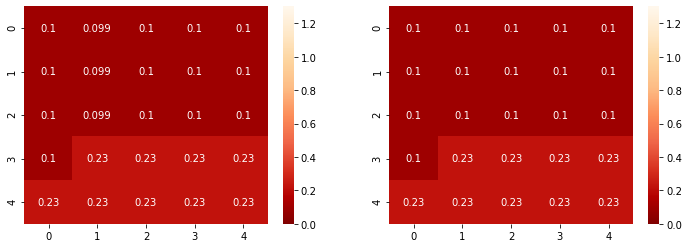

In [27]:
real=np.zeros((25,1))
predctd = np.zeros((25,1))

pos = int(input("Enter an integer between 0 to 10108 to test the model : "))
pos = pos*25+9

real=test_y[pos:pos+25,-1]
predctd = y_pred[pos:pos+25,-1]

real=np.reshape(real,(5,5))
predctd = np.reshape(predctd,(5,5))


print("Heatmap Actual and Heatmap predicted")
plt.figure(figsize=(12,4))
plt.subplot(121)
heat_map = sb.heatmap(real, vmin = 0, vmax = 1.30141, cmap="OrRd_r", annot=True)
plt.subplot(122)
heat_map = sb.heatmap(predctd,  vmin = 0, vmax = 1.30141, cmap="OrRd_r", annot=True)

In [22]:
print(test_org.shape)
print(result.shape)

(252725, 61)
(252725, 2)


In [23]:
252725/25

10109.0